# Importing Library:

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from IPython.display import HTML




# Loading Dataset

In [5]:
boston=load_boston()

#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Put The dataset In Pandas


In [6]:
features=pd.DataFrame(boston.data, columns=boston.feature_names)
features



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [8]:
target=pd.DataFrame(boston.target,columns=['target'])
target


,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
max(target['target'])

50.0

In [10]:
min(target['target'])

5.0

# Concatenate the target Feature in a single datset

In [11]:
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Calculate the correlation & ploting it:

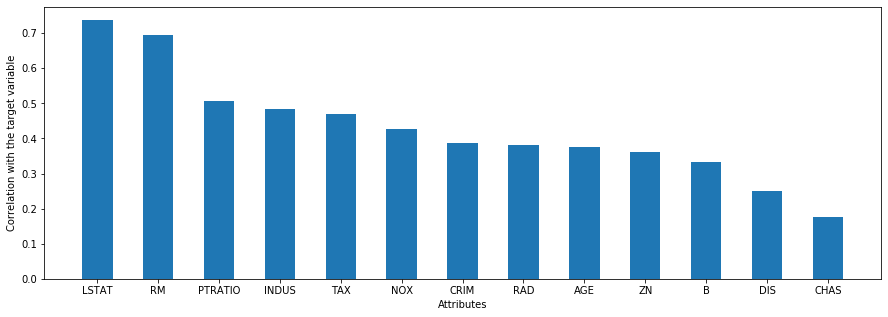

In [13]:
corr=df.corr('pearson')

#take absolute values of correlation
corrs=[abs(corr[attr]['target'])for attr in list(features)]

#make a list of pairs (corr,feature)
l=list(zip(corrs, list(features)))

#sort the list of pairs in decreasing order
#withy the correlation value as the key for features
l.sort(key=lambda x : x[0], reverse=True)

#unzip paires to two list
corrs, labels=list(zip((*l)))

#plot correlation with respect to the target variable as a bar graph
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels)
plt.show()

# Normalisation

In [14]:
X=df['LSTAT'].values
Y=df['target'].values

In [15]:
#print before normalisation
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [16]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:, -1]

y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:, -1]

In [17]:
#print after normalisation
print(Y[:5])


[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


# Splitting the datset in test-set & train-set:

In [29]:
xtrain, xtest, ytrain, ytest= train_test_split(X, Y, test_size=0.2)
xtrain=xtrain.reshape(-1,1)
ytrain=ytrain.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)



# Calculating the cost function

In [19]:
def error(m, x, c, t):
    N=x.size
    e=sum(((m * x + c)-t))
    return (e *1/(2 * N))


In [20]:
def update(m, x, c, t, learning_rate):
    grad_m=sum(2* ((m*x+c)-t)*x)
    grad_m=sum(2* ((m*x+c)-t))
    m=m-grad_m * learning_rate
    c=c-grad_c*learning_rate
    return m,c


In [21]:
def gradient_descent(init_m, init_c,x,t, learning_rate, iterations, error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e<error_threshold:
            print("Error less than the threshold. stoping gradient descent")
            break
        error_values.append(e)
        m, c=update(m, x, c, t, learning_rate)
        mc_values.append((m,c))
    return m, c, error_values, mc_values


In [22]:
%%time
init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001
m, c, error_values, mc_values= gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)


Error less than the threshold. stoping gradient descent
Wall time: 0 ns


# plotting the regression line upon the training data:

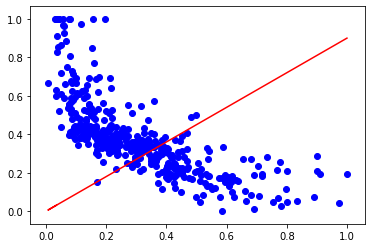

In [23]:
plt.scatter(xtrain, ytrain, color='b')
plt.plot(xtrain, (m*xtrain+c), color='r')

# Training the model

In [35]:
#define the regressor object
lm=LinearRegression()


In [36]:
#fitting the model
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#parameter of feature
lm.coef_


array([[-0.76263277]])

# Making prediction

In [38]:
#making prediction
prediction=lm.predict(xtest)


Text(0.5, 0, 'Prediction')

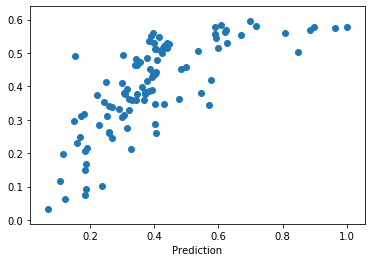

In [39]:
#plotting
plt.scatter(ytest, prediction)
plt.xlabel('Y_test')
plt.ylabel('Prediction')


In [44]:
#import evalution metrics
print('MSE: ', metrics.mean_squared_error(ytest, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(ytest, prediction)))

MSE:  0.015934323956721105
RMSE:  0.1262312320969779


In [45]:
p=pd.DataFrame(list(zip(xtest,ytest,prediction)), columns=['x','target_y','prediction'])
p

,x,target_y,prediction
0,[0.320364238410596],[0.34666666666666673],[0.37591038015242867]
1,[0.0543598233995585],[1.0],[0.5787740628608318]
2,[0.04966887417218542],[0.6088888888888888],[0.5823515344438638]
3,[0.1801876379690949],[0.3422222222222222],[0.48281364863362036]
4,[0.15149006622516556],[0.42],[0.5046993571415809]
...,...,...,...
97,[0.23813465783664456],[0.4022222222222223],[0.4386213526079309]
98,[0.06705298013245034],[0.6244444444444445],[0.569093845636157]
99,[0.47102649006622516],[0.25777777777777783],[0.26101041048563606]
100,[0.11727373068432673],[0.39777777777777773],[0.530793855747226]


# Plotting the predicted values against the target values

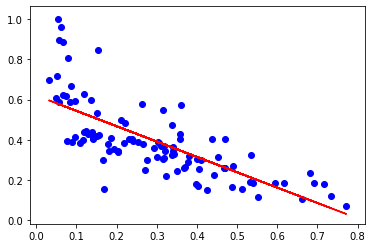

In [46]:
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, prediction, color='r')


# Reverting Normalization to obtain predicted prices of house

In [50]:
#reshaping to change the shape required by scaler
prediction=prediction.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)
xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=x_scaler.inverse_transform(ytest)
prediction_scaled=y_scaler.inverse_transform(prediction)

#to remove extra dim
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]


p=pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, prediction_scaled)), columns=['x','target_y','prediction'])
p.describe().round(decimals=2)
p





,x,target_y,prediction
0,13.34,14.293200,[21.915967106859288]
1,3.70,37.970000,[31.04483282873743]
2,3.53,23.796133,[31.205819049973872]
3,8.26,14.132133,[26.726614188512915]
4,7.22,16.950800,[27.71147107137114]
...,...,...,...
97,10.36,16.306533,[24.737960867356893]
98,4.16,24.359867,[30.609223053627062]
99,18.80,11.071867,[16.74546847185362]
100,5.98,16.145467,[28.885723508625173]
